# Restaurant Sales Analysis

This project analyzes restaurant sales data to extract business insights such as
total revenue, average bill value, and top-selling items.


NUMPY - to work with number related data
pandas -  to work with all data
data handle eda
columns are feautres row are record sample observation


In [2]:
import pandas as pd
df1 = pd.read_csv("i1.csv")
df2 = pd.read_csv("i2.csv")


In [3]:
#merge data
data = df1.merge(df2,how = 'outer')  # it merges all rows and columns even if it is not same
'''merged_df = pd.concat([df1, df2], ignore_index=True)
print(merged_df)'''


'merged_df = pd.concat([df1, df2], ignore_index=True)\nprint(merged_df)'

In [4]:
#eda info ,describe,shape,null,data viz
s = data.shape
siz = data.size
print(siz)
print(s)

249936
(15621, 16)


In [5]:
inf = data.info()
print(inf)
des = data.describe()
print(des)
null = data.isnull().sum()
print(null)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB
None
        Invoice No.         Price          Qty.     Sub Total      D

In [6]:
data["Invoice No."].unique()


array([23465, 23466, 23467, ..., 28387, 28388, 28389])

In [7]:
data["Invoice No."].nunique()


4925

In [8]:
data['Final Total'].sum()

np.float64(2397010.12)

In [9]:
#avg -  total sum/ no of bill(invoice)
avg = ((data['Final Total'].sum())/(data['Invoice No.'].nunique()))
print(avg)

486.70256243654825


In [10]:
#sum of particular bill
data.groupby('Invoice No.')['Final Total'].sum().loc[28327]

np.float64(1081.5)

In [11]:
# highest quantity sold item or favourite item [0:3] give inorder retrive top 3 highest sold quantity
top_3= data.groupby('Item Name')['Qty.'].sum().sort_values(ascending = False)[0:3]
print(top_3)

Item Name
Mineral Water                             1672.0
Chicken Biriyani With Raitha And Gravy    1453.0
Butter Naan                               1046.0
Name: Qty., dtype: float64


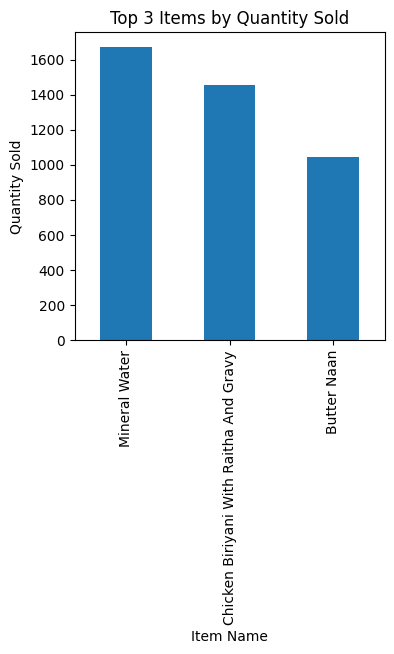

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
top_3.plot(kind='bar')
plt.title('Top 3 Items by Quantity Sold')
plt.xlabel('Item Name')
plt.ylabel('Quantity Sold')
plt.show()

In [13]:
#top 3 sold item by revenue
top_3_revenue= data.groupby('Item Name')['Final Total'].sum().sort_values(ascending = False)[0:3]
print(top_3_revenue)

Item Name
Chicken Biriyani With Raitha And Gravy    240730.96
Chicken Fried Rice                        119347.20
Butter Naan                                65387.74
Name: Final Total, dtype: float64


In [14]:
#highest sold invoice on 14 -9-2023
# filter data for the given date
date_data = data[data['Date'] == '14-09-2023']
hs = (
    date_data.groupby('Invoice No.')['Final Total'] .sum().sort_values(ascending=False)
)
print(hs)


Series([], Name: Final Total, dtype: float64)


In [15]:
# Identify invoices whose bill value is above overall avg bill value
invoice_total=data.groupby('Invoice No.')['Final Total'].sum() > data.groupby('Invoice No.')['Final Total'].sum().mean()
print(invoice_total)

Invoice No.
23465     True
23466    False
23467     True
23468    False
23469    False
         ...  
28385     True
28386     True
28387     True
28388     True
28389     True
Name: Final Total, Length: 4925, dtype: bool


In [16]:
data.groupby('Invoice No.')['Final Total'].sum()

,Final Total
Invoice No.,
23465,1134.00
23466,441.00
23467,774.88
23468,273.00
23469,462.00
...,...
28385,493.50
28386,1479.44
28387,1501.50
